In [28]:
!pip install gensim
!pip install nltk


     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ------------------ --------------------- 30.7/67.1 kB ? eta -:--:--
     ------------------ --------------------- 30.7/67.1 kB ? eta -:--:--
     ------------------ --------------------- 30.7/67.1 kB ? eta -:--:--
     -------------------------------------- 67.1/67.1 kB 302.6 kB/s eta 0:00:00
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/8d/93/8448d3f1aa9d2911b8cba2602aaa1af85eb31a26d28b7b737f1fa5b40c02/simpful-2.11.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=fb928ca9f80aacf0882c2732ce31bc349cfd34037475855a5be9e0a0990e2836
  Stored in directory: c:\users\avisa\appdata\local\pip\cache\wheels\69\f

In [31]:
import os
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Path to the folder containing your text files
folder_path = r"C:\Users\avisa\OneDrive\Desktop\Daily Tasks for LINKEDIN\task-2\politics"


# Function to preprocess and tokenize text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # You can customize this based on your requirements
    return tokens

# Load and preprocess documents
documents = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            tokens = preprocess_text(text)
            documents.append(TaggedDocument(tokens, [file_name]))

# Train Doc2Vec model
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

# Save the trained model
model.save("doc2vec_model")

# Example: Retrieve most similar documents to a query
query = "neural networks and information retrieval"
query_tokens = preprocess_text(query)
query_vector = model.infer_vector(query_tokens)
similar_documents = model.dv.most_similar([query_vector])


# Print the most similar documents
print(f"Query: {query}")
for doc_id, similarity in similar_documents:
    print(f"Similarity: {similarity:.2f}, Document: {doc_id}")


Query: neural networks and information retrieval
Similarity: 0.98, Document: politics_21.txt
Similarity: 0.98, Document: politics_53.txt
Similarity: 0.98, Document: politics_74.txt
Similarity: 0.98, Document: politics_67.txt
Similarity: 0.98, Document: politics_72.txt
Similarity: 0.98, Document: politics_16.txt
Similarity: 0.98, Document: politics_95.txt
Similarity: 0.98, Document: politics_46.txt
Similarity: 0.98, Document: politics_58.txt
Similarity: 0.98, Document: politics_35.txt


Enter your query: neural networks


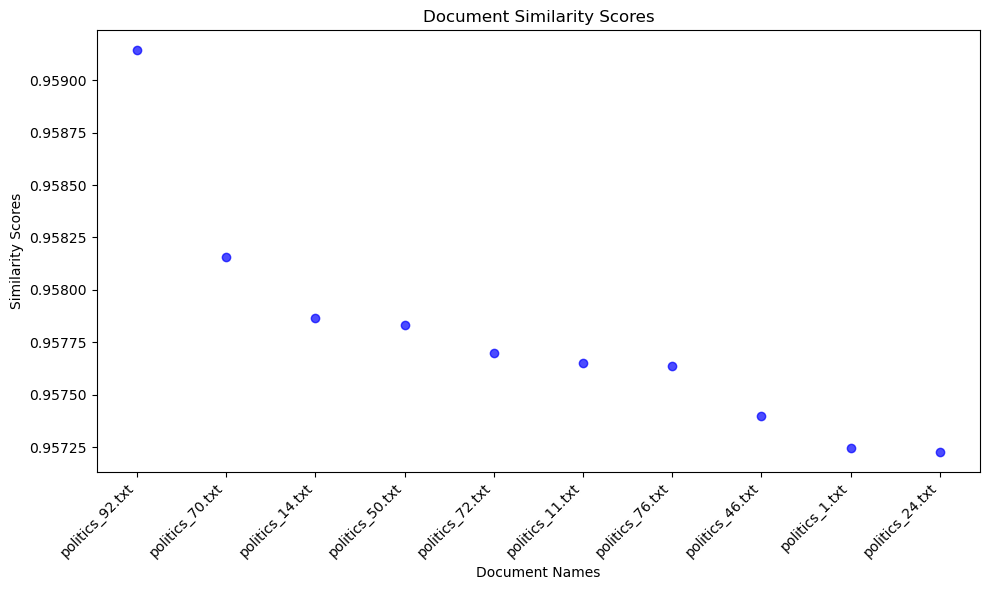


Query: neural networks
Similarity: 0.96, Document: politics_92.txt
Similarity: 0.96, Document: politics_70.txt
Similarity: 0.96, Document: politics_14.txt
Similarity: 0.96, Document: politics_50.txt
Similarity: 0.96, Document: politics_72.txt
Similarity: 0.96, Document: politics_11.txt
Similarity: 0.96, Document: politics_76.txt
Similarity: 0.96, Document: politics_46.txt
Similarity: 0.96, Document: politics_1.txt
Similarity: 0.96, Document: politics_24.txt


In [34]:
import os
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Path to the folder containing your text files
folder_path = r"C:\Users\avisa\OneDrive\Desktop\Daily Tasks for LINKEDIN\task-2\politics"

# Function to preprocess and tokenize text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

# Load and preprocess documents
documents = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            tokens = preprocess_text(text)
            documents.append(TaggedDocument(tokens, [file_name]))

# Train Doc2Vec model
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

# Save the trained model
model.save("doc2vec_model")

# User input for a query
user_query = input("Enter your query: ")
query_tokens = preprocess_text(user_query)
query_vector = model.infer_vector(query_tokens)
similar_documents = model.dv.most_similar([query_vector])

# Extract document names and similarity scores for plotting
doc_names, similarity_scores = zip(*similar_documents)

# Visualization: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(doc_names, similarity_scores, color='blue', alpha=0.7)
plt.title('Document Similarity Scores')
plt.xlabel('Document Names')
plt.ylabel('Similarity Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Print the most similar documents
print(f"\nQuery: {user_query}")
for doc_id, similarity in similar_documents:
    print(f"Similarity: {similarity:.2f}, Document: {doc_id}")
